# SEaM free text sentiment visualiser

Start by selecting a file. (The widget seems to need you to click on `Select` before it actually starts properly.)

In [1]:
from ipyfilechooser import FileChooser

fc=FileChooser()
display(fc)

FileChooser(path='/Users/alistair.willis/repos/seam_analyser', filename='', title='', show_hidden=False, selec…

## Pull in the data and import libraries

So the data doesn't appear to be in a standard format. I'll continue to assume that the student responses are all in sheet 2, but I'll try to suck out the columns containing free text. Again, `NLTK` is probably the best approach for this.

Plots the data from a SEaM spreadsheet as a series of bar charts. Change the filename in the marked cell to input from a new spreadsheet, then run all.

AFAIK, the data is in a standard format.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [4]:
# Change this line to read the seam file

feedback_df=pd.read_excel('SEaM Open Comments for TM351-2020J Faculty of Science Technology Engineering and Mathematics .xlsx', sheet_name=2)

Check the contents of the dataframe:

In [5]:
feedback_df.head()

,coursepres,q1:The way the module materials were presented helped to maintain my interest.,q2:The study workload on this module fitted with my personal circumstances.,q3:The structure of the module meant I could interact with my peers when learning.,q4:Resources I accessed through the Library (e.g. journal articles) helped me to understand the core concepts of the module.,q5:I was satisfied with the opportunities I had to attend tutorials (either face to face or online).,"q6:Sufficient opportunities were provided to check my understanding on the module, for example by completing iCMAs or TMAs.",q7:The instructions on how to complete the assessed tasks were easy to follow.,q8:It was obvious how the module materials related to the assessed tasks on this module.,q9:There was enough time in the study planner to prepare for the end of module assessment.,...,q17:My tutors feedback on assessed tasks helped me to learn.,q18:My tutor supported me in developing professional or work-related skills.,q19:I have received sufficient advice and guidance in relation to my module.,q20:I have a clear idea about my next module choice.,q21:I was satisfied with the quality of the module.,q22:I would recommend OU study to other students.,q23:My studies have helped me develop my self-confidence.,"If you answered Disagree to any of the statements above, we would like to understand why so we can make improvements in the future","Do you have any further comments about your teaching, assessment and learning on this module?",Do you have any other comments to add about your study experience on this module?
0,TM351-2020J,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,...,1. Definitely agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,NaN,NaN,NaN
1,TM351-2020J,2. Mostly agree,1. Definitely agree,3. Neither agree nor disagree,4. Mostly disagree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,...,1. Definitely agree,6. Not applicable/used,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,NaN,NaN,NaN
2,TM351-2020J,2. Mostly agree,2. Mostly agree,3. Neither agree nor disagree,3. Neither agree nor disagree,1. Definitely agree,2. Mostly agree,2. Mostly agree,2. Mostly agree,2. Mostly agree,...,3. Neither agree nor disagree,6. Not applicable/used,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,3. Neither agree nor disagree,NaN,NaN,NaN
3,TM351-2020J,1. Definitely agree,1. Definitely agree,3. Neither agree nor disagree,2. Mostly agree,2. Mostly agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,...,1. Definitely agree,3. Neither agree nor disagree,1. Definitely agree,6. Not applicable/used,1. Definitely agree,2. Mostly agree,1. Definitely agree,NaN,"TM351 was a unique module, in my opinion. TMAs assessed practical skills and iCMAs assessed theory skills. I question why other modules dont follow suit because it was fascinating doing that. Then again, maybe other modules cannot always use practical programs like Jupyter Notebooks.But assessing in this way stretched my knowledge of using Python as well as a broad range of theory-based content too: DBMS, Mongo, legal and ethical considerations, semantic data, linked data - I was astonished at how much was packed in, and the ability to be assessed on both Python and theory too.The content was detailed. Much more than I would ever have considered in October 2020. Wow.Also, my tutor spoke to me in a really lovely way. I didnt feel I was ""just another student"", rather, I felt like a person that they genuinely cared about. Hes a great gent, thank you!","TM351 is a genuinely incredible module, theres no two ways about that.However, there is no way on this Earth that thi

Now, let's whittle down to the columns we actually want:

In [6]:
feedback_df=(feedback_df
 
 .rename({'If you answered Disagree to any of the statements above, we would like to understand why so we can make improvements in the future':'improvements',
          'Do you have any further comments about your teaching, assessment and learning on this module?':'teaching_assessment_learning',
          'Do you have any other comments to add about your study experience on this module?':'study_experience'},
         axis='columns')

    .filter(['improvements', 'teaching_assessment_learning', 'study_experience'], axis='columns')

    .dropna(axis='rows', how='all')
)

In [7]:
feedback_df.head()

,improvements,teaching_assessment_learning,study_experience
3,NaN,"TM351 was a unique module, in my opinion. TMAs assessed practical skills and iCMAs assessed theory skills. I question why other modules dont follow suit because it was fascinating doing that. Then again, maybe other modules cannot always use practical programs like Jupyter Notebooks.But assessing in this way stretched my knowledge of using Python as well as a broad range of theory-based content too: DBMS, Mongo, legal and ethical considerations, semantic data, linked data - I was astonished at how much was packed in, and the ability to be assessed on both Python and theory too.The content was detailed. Much more than I would ever have considered in October 2020. Wow.Also, my tutor spoke to me in a really lovely way. I didnt feel I was ""just another student"", rather, I felt like a person that they genuinely cared about. Hes a great gent, thank you!","TM351 is a genuinely incredible module, theres no two ways about that.However, there is no way on this Earth that this is a 30 credit module! Theres a lot to the module, sure, but I studied a 60 credit module in 2020-21 as well, and it ended up being bit-part to TM351.The mountain of printed academic investigations for that module was eclipsed by the entire print outs of only the week-to-week print outs of TM351. Come the end of the year, my TM351 folder is 3 times larger than my 60 credit one, and that includes the print outs and aforementioned further academic material in it. The time spent on TM351 was much longer than the 60 credit one too. Sure, a lot is assessed in this module, though the studying and assessment time was simply, probably double that, of my 60 credit module.I loved studying TM351, genuinely, but the time I spent studying this module definitely didnt befit 30 credits.There were multiple upsides to this module, and one of them is the value of the module - in terms of content, this was by far and away the most well-informing module Ive studied with the OU.My tutor was genuinely amazing, I felt at ease with them so quickly. I feel like I can add value to an organisation with the study from this module too. The final investigation was overwhelming by the amount of data available and as a dyslexic, I struggled with understanding and taking in so much at one time, especially with the EMA looming. However, the flexibility of investigating your own question was brilliant, and whereas my EMA questions probably werent the most exciting, the freedom to study something using skills learned on this module gave me great pride. TM351 has given me a lot of accomplishment, and I relished the opportunity to study the module. Thank you!"
4,I found that TM351 was a rather heavy module and it was difficult to digest all the written content.,"I found this module to be challenging and found myself not enjoying it at moments when there was a lot of material to read through. However, this has otherwise been a very interesting and rewarding module. The reading was worth it.",NaN
9,I did not access any resources through the library,NaN,NaN
10,"I was very disappointed to find that the EMA (and to some extent the TMAs) only assessed the data investigation and analysis part of the module. Personally, I mostly took this module for the database management content (I have little interest in the analysis side) and it would have been good to have been assessed on this content in a way that actually counted towards my grade, rather than just in the iCMAs which are so easy to pass that theyre effectively pointless.",NaN,NaN
12,"The EMA required us to write a full data analysis report. However, the module materials contained very little in report writing and focused more on the data analysis methods. Therefore, I would have liked an increased amount of time on the module focused on report writing, so we had more practice before the EMA.",NaN,NaN


In [8]:
from nltk.tokenize import sent_tokenize


OK, let's see if we can put all the sentences into a single DataFrame. Reasonably tidily.

In [9]:
l=[]

ss=(feedback_df['improvements']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'improvements':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df1=pd.DataFrame(l)
df1.head()

,response,sentence_num,improvements
0,4,0,I found that TM351 was a rather heavy module and it was difficult to digest all the written content.
1,9,0,I did not access any resources through the library
2,10,0,I was very disappointed to find that the EMA (and to some extent the TMAs) only assessed the data investigation and analysis part of the module.
3,10,1,"Personally, I mostly took this module for the database management content (I have little interest in the analysis side) and it would have been good to have been assessed on this content in a way that actually counted towards my grade, rather than just in the iCMAs which are so easy to pass that theyre effectively pointless."
4,12,0,The EMA required us to write a full data analysis report.


In [10]:
l=[]

ss=(feedback_df['teaching_assessment_learning']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'teaching_assessment_learning':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df2=pd.DataFrame(l)
df2.head()

,response,sentence_num,teaching_assessment_learning
0,3,0,"TM351 was a unique module, in my opinion."
1,3,1,TMAs assessed practical skills and iCMAs assessed theory skills.
2,3,2,I question why other modules dont follow suit because it was fascinating doing that.
3,3,3,"Then again, maybe other modules cannot always use practical programs like Jupyter Notebooks.But assessing in this way stretched my knowledge of using Python as well as a broad range of theory-based content too: DBMS, Mongo, legal and ethical considerations, semantic data, linked data - I was astonished at how much was packed in, and the ability to be assessed on both Python and theory too.The content was detailed."
4,3,4,Much more than I would ever have considered in October 2020.


In [11]:
l=[]

ss=(feedback_df['study_experience']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'study_experience':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df3=pd.DataFrame(l)
df3.head()

,response,sentence_num,study_experience
0,3,0,"TM351 is a genuinely incredible module, theres no two ways about that.However, there is no way on this Earth that this is a 30 credit module!"
1,3,1,"Theres a lot to the module, sure, but I studied a 60 credit module in 2020-21 as well, and it ended up being bit-part to TM351.The mountain of printed academic investigations for that module was eclipsed by the entire print outs of only the week-to-week print outs of TM351."
2,3,2,"Come the end of the year, my TM351 folder is 3 times larger than my 60 credit one, and that includes the print outs and aforementioned further academic material in it."
3,3,3,The time spent on TM351 was much longer than the 60 credit one too.
4,3,4,"Sure, a lot is assessed in this module, though the studying and assessment time was simply, probably double that, of my 60 credit module.I loved studying TM351, genuinely, but the time I spent studying this module definitely didnt befit 30 credits.There were multiple upsides to this module, and one of them is the value of the module - in terms of content, this was by far and away the most well-informing module Ive studied with the OU.My tutor was genuinely amazing, I felt at ease with them so quickly."


In [12]:
all_comments_df=(pd
                 
                 .merge(df1, df2, how='outer')
                 
                 .merge(df3, how='outer')
                )

all_comments_df.head()

,response,sentence_num,improvements,teaching_assessment_learning,study_experience
0,4,0,I found that TM351 was a rather heavy module and it was difficult to digest all the written content.,I found this module to be challenging and found myself not enjoying it at moments when there was a lot of material to read through.,NaN
1,9,0,I did not access any resources through the library,NaN,NaN
2,10,0,I was very disappointed to find that the EMA (and to some extent the TMAs) only assessed the data investigation and analysis part of the module.,NaN,NaN
3,10,1,"Personally, I mostly took this module for the database management content (I have little interest in the analysis side) and it would have been good to have been assessed on this content in a way that actually counted towards my grade, rather than just in the iCMAs which are so easy to pass that theyre effectively pointless.",NaN,NaN
4,12,0,The EMA required us to write a full data analysis report.,NaN,NaN


In [13]:
all_comments_df=(all_comments_df
 
                 .sort_values(['response', 'sentence_num'])
 
                 .set_index(['response', 'sentence_num'])
)

all_comments_df

improvements  \
response sentence_num                                                                                                                                                                                                                                                                                                                                                                                                                                                         
3        0                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         1                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         2                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         3                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         4                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         5                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         6                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   
         7                                                                                                                                                                                                                                                                              

In [14]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [47]:
sns.diverging_palette(10, 125, s=75, l=50,
                                  n=16, center="light")

[(0.8545371341681446, 0.22957019267094914, 0.2762321841840895),
 (0.8673249565811431, 0.324891188721002, 0.36532329669250857),
 (0.8801127789941414, 0.4202121847710548, 0.45441440920092774),
 (0.8929006014071399, 0.5155331808211077, 0.5435055217093469),
 (0.906063067054894, 0.6136467841773143, 0.635206725404536),
 (0.9188508894678925, 0.7089677802273672, 0.7242978379129551),
 (0.9316387118808909, 0.80428877627742, 0.8133889504213743),
 (0.9444265342938893, 0.8996097723274729, 0.9024800629297933),
 (0.886753429692115, 0.9252930344770272, 0.8825422791235433),
 (0.7974936879014439, 0.868249489534432, 0.788438813627399),
 (0.708233946110773, 0.8112059445918369, 0.6943353481312547),
 (0.6189742043201019, 0.7541623996492418, 0.6002318826351104),
 (0.5270994310316574, 0.6954476571009066, 0.5033714796732588),
 (0.4378396892409864, 0.6384041121583116, 0.4092680141771145),
 (0.3485799474503153, 0.5813605672157163, 0.3151645486809701),
 (0.25932020565964425, 0.5243170222731213, 0.22106108318482592)]

In [48]:
sns.diverging_palette?

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
sia = SentimentIntensityAnalyzer()

In [49]:
def polarity_scores_check(txt):
    try:
        return sia.polarity_scores(txt)['compound']
    except:
        return 0

all_comments_df.applymap(polarity_scores_check)

improvements  teaching_assessment_learning  \
response sentence_num                                               
3        0                   0.0000                        0.0000   
         1                   0.0000                        0.0000   
         2                   0.0000                        0.5423   
         3                   0.0000                        0.9062   
         4                   0.0000                        0.0000   
         5                   0.0000                        0.6240   
         6                   0.0000                        0.6486   
         7                   0.0000                        0.7840   
         8                   0.0000                        0.0000   
         9                   0.0000                        0.0000   
4        0                  -0.3612                       -0.2905   
         1                   0.0000                        0.7688   
         2                   0.0000                        0.2263   
9        0                   0.0000                        0.0000   
10       0                  -0.5256                        0.0000   
         1                   0.9052                        0.0000   
12       0                   0.0000                        0.0000   
         1                   0.3818                        0.0000   
         2                   0.7579                        0.0000   
13       0                  -0.6249                        0.8540   
         1                   0.3612                        0.4754   
15       0                   0.3612                        0.4939   
         1                   0.4939                        0.1779   
         2                  -0.2411                       -0.6808   
         3                   0.4215                       -0.3182   
         4                   0.0000                       -0.3612   
         5                   0.0000                        0.4215   
17       0                   0.3612                        0.0000   
         1                   0.5563                        0.0000   
18       0                  -0.7579                        0.3182   
         1                  -0.2960                        0.0000   
         2                  -0.3400                        0.0000   
         3                  -0.0263                        0.0000   
19       0                   0.0000                        0.6542   
         1                   0.0000                        0.4939   
23       0                   0.0000                        0.4215   
         1                   0.0000                        0.0000   
         2                   0.0000                        0.0772   
24       0                  -0.2924                        0.0000   
25       0                  -0.4576                        0.0000   
         1                  -0.3612                       -0.4404   
         2                   0.0000                       -0.6314   
         3                   0.0000                       -0.6124   
         4                   0.0000                       -0.3612   
26       0                   0.6865                       -0.6437   
         1                   0.1406                        0.3149   
         2                   0.0000                        0.0000   
         3                   0.0243                        0.0000   
         4                  -0.6249                        0.0000   
         5                  -0.2755                        0.0000   
27       0                  -0.0258                        0.0000   
         1                   0.0000                        0.0000   
         2                  -0.3343                        0.0000   
28       0                  -0.3182                        0.0000   
         1                  -0.2658                        0.0000   
         2                  -0.3182                        0.0000   
         3           

OK, that seems to be more or less working. So now let's see whether we can colour the cells...

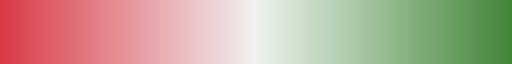

In [53]:
sentiment_colour_map=sns.diverging_palette(10, 125, s=75, l=50,
                                           n=8, center="light", as_cmap=True)
sentiment_colour_map

In [58]:
all_comments_df.style.background_gradient(cmap=sentiment_colour_map,
                                         axis=None, vmin=-1, vmax=1,
                                          gmap=all_comments_df.applymap(polarity_scores_check))

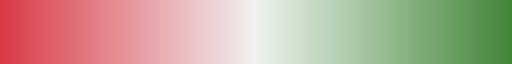

In [57]:
sentiment_colour_map

In [ ]:
vmin=None, vmax=None